# Overview of MEG/EEG analysis with MNE-Python


In [1]:
print("Overview of MEG/EEG analysis with MNE-Python")

Overview of MEG/EEG analysis with MNE-Python



Core MNE-Python data structures :¶

- Raw
- Epochs
- Evoked
- SourceEstimate


In [2]:
# %pip install numpy mne
# %pip install pyvistaqt ipyevents ipywidgets
# %pip install nibabel
# %pip install ipympl
# %pip install pyvista ipyvtklink ipywidgets trame
# %pip install pyvista pyvistaqt PyQt6
# %pip install vtk
# %pip install scikit-learn
%pip install darkdetect


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import mne

## Loading Data

MNE-Python data structures are based around the FIF file format from Neuromag, but there are reader functions for [a wide variety of other data formats](https://mne.tools/stable/documentation/implementation.html#data-formats). MNE-Python also has interfaces to a variety of [publicly available datasets](https://mne.tools/stable/documentation/datasets.html#datasets), which MNE-Python can download and manage for you.

The FIF file format is **a versatile file type associated with multiple distinct data formats**. Primarily, it is used as a specialized binary data file for neuroimaging research, specifically for storing raw data from magnetoencephalography (MEG) and electroencephalography (EEG) experiments, processed by tools like MNE-Python. These files are crucial in neuroscience for signal processing and analysis, often containing data from brain experiments and associated with file names like `sample_audvis_raw.fif`.

We'll be using example Dataset called : [Sample](https://mne.tools/stable/documentation/datasets.html#sample). We are using a filtered and downsampled version of the data `sample_audvis_filt-0-40_raw.fif`, but an unfiltered version (`sample_audvis_raw.fif`) is also included.

In [4]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/qbit-glitch/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [5]:
print(raw)
print(raw.info)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MiB, data not loaded>
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


By default, [**`read_raw_fif`**](https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif) displays some information about the file it’s loading; for example, here it tells us that there are four “projection items” in the file along with the recorded data; those are [SSP projectors](https://mne.tools/stable/documentation/glossary.html#term-projector) calculated to remove environmental noise from the MEG signals, plus a projector to mean-reference the EEG channels; these are discussed in the tutorial [Background on projectors and projections](https://mne.tools/stable/auto_tutorials/preprocessing/45_projectors_background.html#tut-projectors-background). In addition to the information displayed during loading, you can get a glimpse of the basic details of a [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) object by printing it; even more is available by printing its `info` attribute (a [**`dictionary-like object`**](https://mne.tools/stable/generated/mne.Info.html#mne.Info) that is preserved across [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw), [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs), and [**`Evoked`**](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked) objects). The `info` data structure keeps track of channel locations, applied filters, projectors, etc. Notice especially the `chs` entry, showing that MNE-Python detects different sensor types and handles each appropriately. See [The Info data structure](https://mne.tools/stable/auto_tutorials/intro/30_info.html#tut-info-class) for more on the [**`Info`**](https://mne.tools/stable/generated/mne.Info.html#mne.Info) class.

[**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) objects also have several built-in plotting methods; here we show the power spectral density (PSD) for each sensor type with [**`compute_psd`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.compute_psd), as well as a plot of the raw sensor traces with [**`plot`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot). In the PSD plot, we’ll only plot frequencies below 50 Hz (since our data are low-pass filtered at 40 Hz). In interactive Python sessions, [**`plot`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot) is interactive and allows scrolling, scaling, bad channel marking, annotations, projector toggling, etc.

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: overflow encountered in matmul
  data = self.mne.projector @ data
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: invalid value encountered in matmul
  data = self.mne.projector @ data


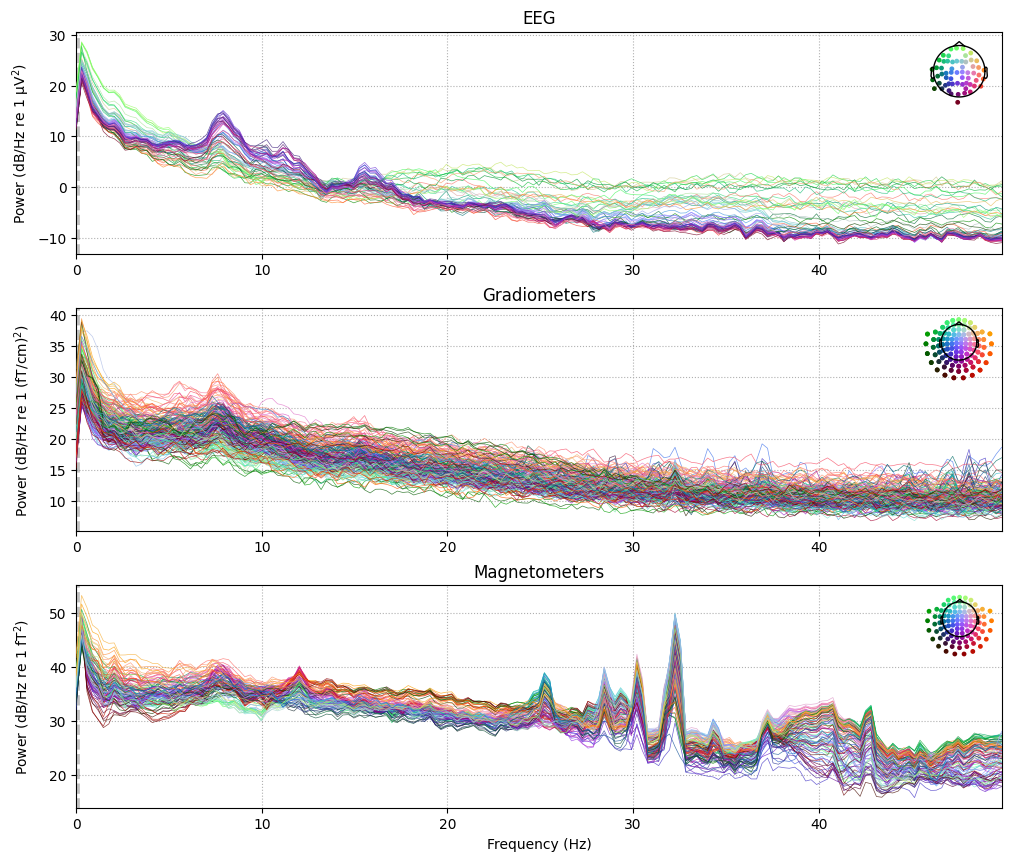

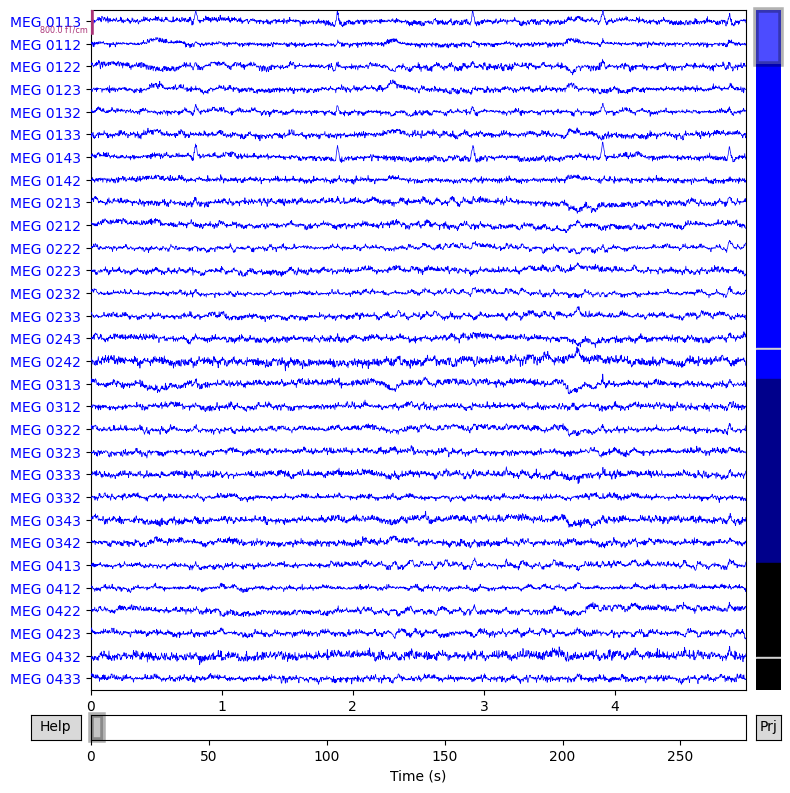

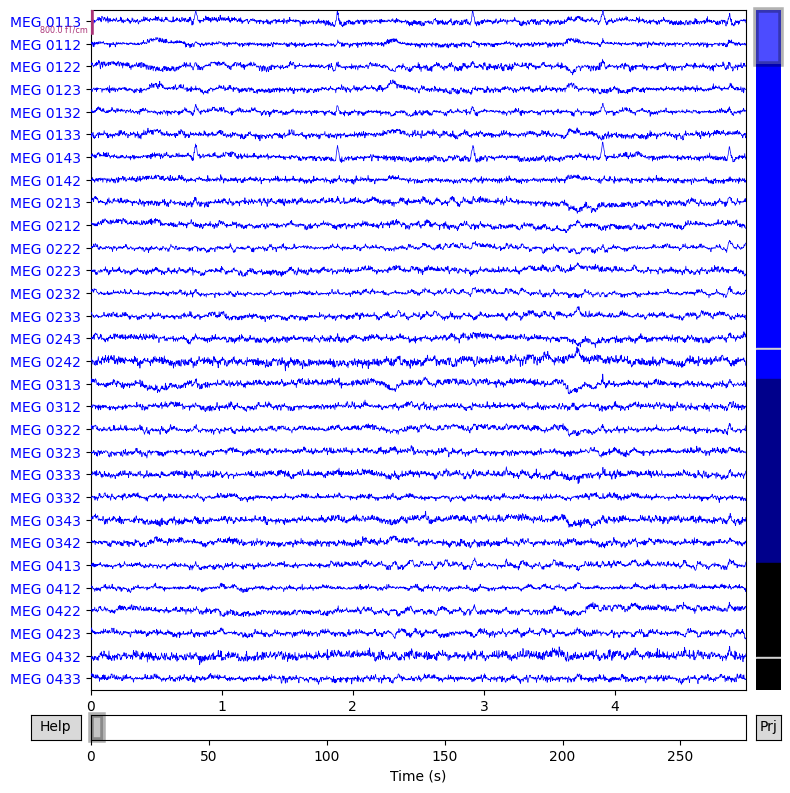

In [6]:
raw.compute_psd(fmax = 50).plot(picks='data', exclude='bads', amplitude=False)
raw.plot(duration=5, n_channels=30)

## Preprocessing

MNE-Python supports a variety of preprocessing approaches and techniques (maxwell filtering, signal-space projection, independent components analysis, filtering, downsampling, etc); see the full list of capabilities in the [**`mne.preprocessing`**](https://mne.tools/stable/api/preprocessing.html#module-mne.preprocessing) and [**`mne.filter`**](https://mne.tools/stable/api/preprocessing.html#module-mne.filter) submodules. Here we’ll clean up our data by performing independent components analysis ([**`ICA`**](https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA)); for brevity we’ll skip the steps that helped us determined which components best capture the artifacts (see [Repairing artifacts with ICA](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#tut-artifact-ica) for a detailed walk-through of that process).


We'll clean our data by performing Independent Components Analysis (ICA).

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components


/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow e

Fitting ICA took 3.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


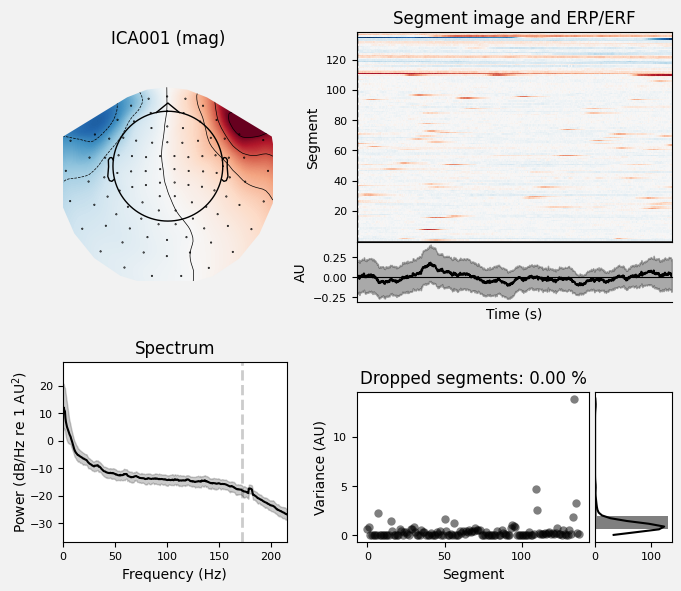

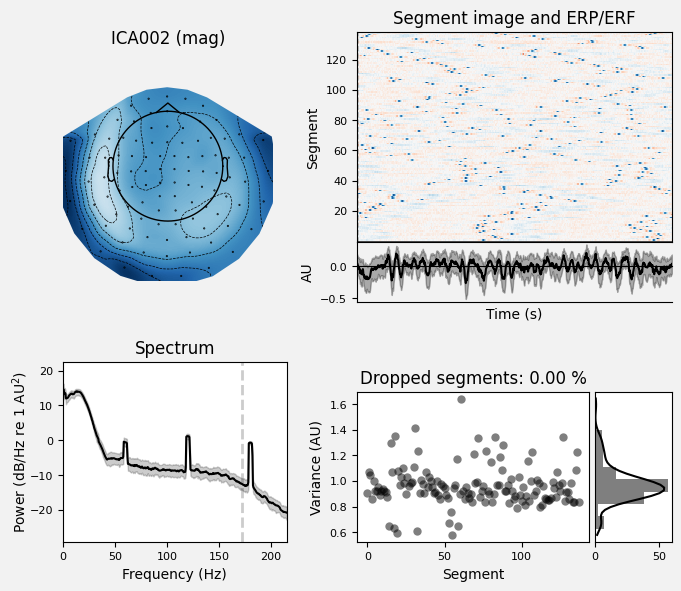

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [7]:
# Set up and fit the ICA
ica = mne.preprocessing.ICA(n_components = 20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2]     # details on how we picked these are omitted here
ica.plot_properties(raw, picks = ica.exclude)

Once we’re confident about which component(s) we want to remove, we pass them as the `exclude` parameter and then apply the ICA to the raw signal. The [**`apply`**](https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA.apply) method requires the raw data to be loaded into memory (by default it’s only read from disk as-needed), so we’ll use [**`load_data`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.load_data) first. We’ll also make a copy of the [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) object so we can compare the signal before and after artifact removal side-by-side:

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/preprocessing/ica.py:2400: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/preprocessing/ica.py:2400: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/preprocessing/ica.py:2400: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: Run

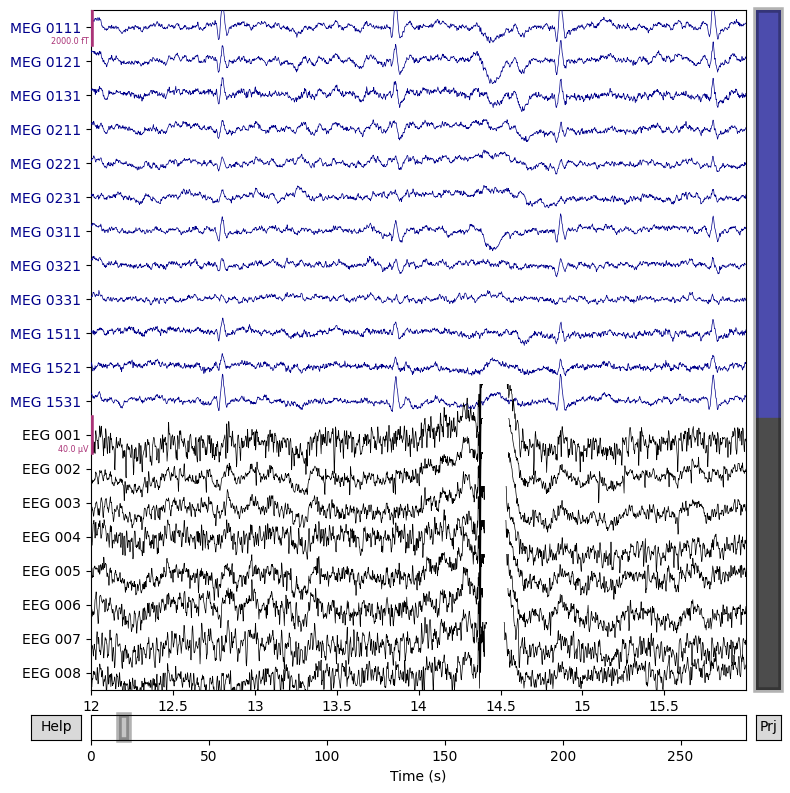

/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: overflow encountered in matmul
  data = self.mne.projector @ data
/Users/qbit-glitch/Desktop/coding-projects/eeg_signal_processing/venv_2/lib/python3.10/site-packages/mne/viz/_figure.py:380: RuntimeWarning: invalid value encountered in matmul
  data = self.mne.projector @ data


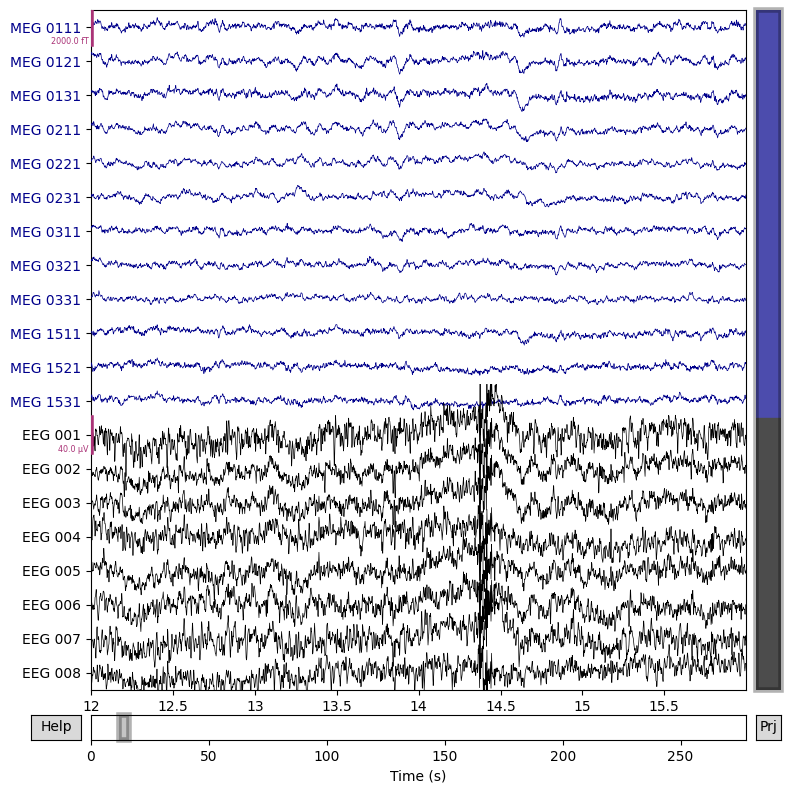

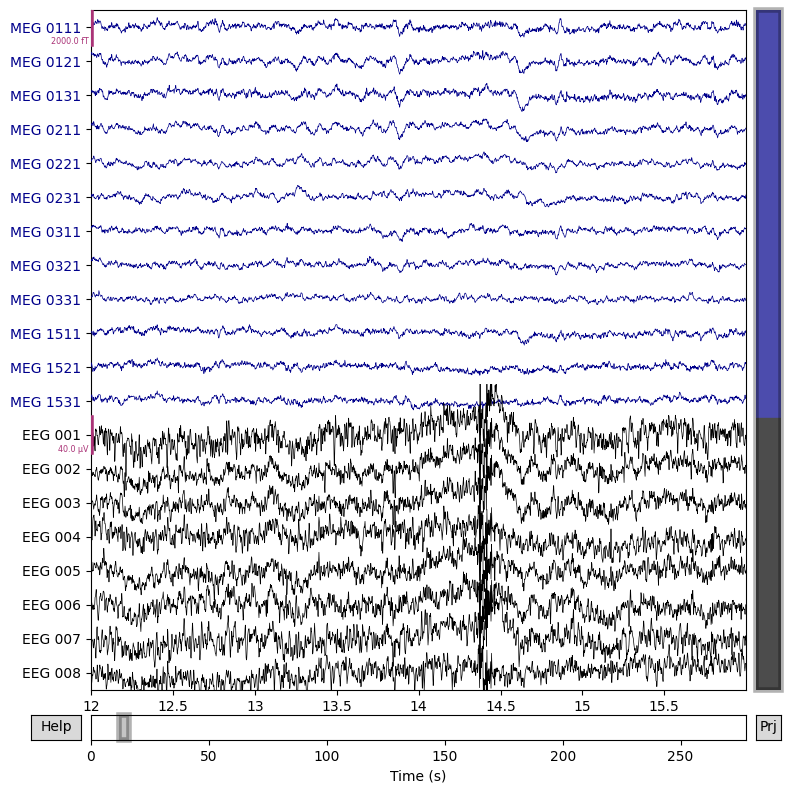

In [8]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw, verbose=None)

# show some frontal channels to clearly illustrate the artifact removal
chs = [
    'MEG 0111',
    'MEG 0121',
    'MEG 0131',
    'MEG 0211',
    'MEG 0221',
    'MEG 0231',
    'MEG 0311',
    'MEG 0321',
    'MEG 0331',
    'MEG 1511',
    'MEG 1521',
    'MEG 1531',
    'EEG 001',
    'EEG 002',
    'EEG 003',
    'EEG 004',
    'EEG 005',
    'EEG 006',
    'EEG 007',
    'EEG 008',
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

## Detecting experimental Events

The sample dataset includes several [“STIM” channels](https://mne.tools/stable/documentation/glossary.html#term-stim-channel) that recorded electrical signals sent from the stimulus delivery computer (as brief DC shifts / squarewave pulses). These pulses (often called “triggers”) are used in this dataset to mark experimental events: stimulus onset, stimulus type, and participant response (button press). The individual STIM channels are combined onto a single channel, in such a way that voltage levels on that channel can be unambiguously decoded as a particular event type. On older Neuromag systems (such as that used to record the sample data) this summation channel was called `STI 014`, so we can pass that channel name to the [**`mne.find_events`**](https://mne.tools/stable/generated/mne.find_events.html#mne.find_events) function to recover the timing and identity of the stimulus events.



In [9]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


The resulting events array is an ordinary 3-column [**`NumPy array`**](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray), with sample number in the first column and integer event ID in the last column; the middle column is usually ignored. Rather than keeping track of integer event IDs, we can provide an *event dictionary* that maps the integer IDs to experimental conditions or events. In this dataset, the mapping looks like this:

| Event ID | Condition |
| --- | --- |
| 1 | auditory stimulus (tone) to the left ear |
| 2 | auditory stimulus (tone) to the right ear |
| 3 | visual stimulus (checkerboard) to the left visual field |
| 4 | visual stimulus (checkerboard) to the right visual field |
| 5 | smiley face (catch trial) |
| 32 | subject button press |

Event dictionaries like this one are used when extracting epochs from continuous data; the `/` character in the dictionary keys allows pooling across conditions by requesting partial condition descriptors (i.e., requesting `'auditory'` will select all epochs with Event IDs 1 and 2; requesting `'left'` will select all epochs with Event IDs 1 and 3). An example of this is shown in the next section. There is also a convenient [**`plot_events`**](https://mne.tools/stable/generated/mne.viz.plot_events.html#mne.viz.plot_events) function for visualizing the distribution of events across the duration of the recording (to make sure event detection worked as expected). Here we will also make use of the [**`Info`**](https://mne.tools/stable/generated/mne.Info.html#mne.Info) attribute to get the sampling frequency of the recording (so our x-axis will be in seconds instead of in samples).

In [10]:
event_dict = {
    'auditory/left': 1,
    'auditory/right': 2,
    'visual/left' : 3,
    'visual/right' : 4,
    'smiley' : 5,
    'buttonpress' : 32, 
}

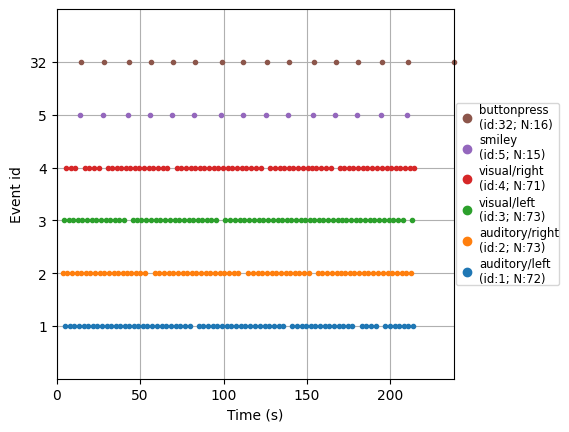

In [11]:
fig = mne.viz.plot_events(
    events, event_id = event_dict,
    sfreq = raw.info['sfreq'],
    first_samp = raw.first_samp
)

For paradigms that are not event-related (e.g., analysis of resting-state data), you can extract regularly spaced (possibly overlapping) spans of data by creating events using [**`mne.make_fixed_length_events`**](https://mne.tools/stable/generated/mne.make_fixed_length_events.html#mne.make_fixed_length_events) and then proceeding with epoching as described in the next section.

## Epoching Continuous Data

The [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) object and the events array are the bare minimum needed to create an [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) object, which we create with the [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) class constructor. Here we’ll also specify some data quality constraints: we’ll reject any epoch where peak-to-peak signal amplitude is beyond reasonable limits for that channel type. This is done with a *rejection dictionary*; you may include or omit thresholds for any of the channel types present in your data. The values given here are reasonable for this particular dataset, but may need to be adapted for different hardware or recording conditions. For a more automated approach, consider using the [autoreject package](http://autoreject.github.io/).


In [12]:
reject_criteria = dict(
    mag = 4000e-15,     # 4000 fT
    grad = 4000e-13,    # 4000 fT/cm
    eeg = 150e-6,       # 150 µV
    eog = 250e-6,
)  # 250 µV


We’ll also pass the event dictionary as the `event_id` parameter (so we can work with easy-to-pool event labels instead of the integer event IDs), and specify `tmin` and `tmax` (the time relative to each event at which to start and end each epoch). As mentioned above, by default [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) and [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) data aren’t loaded into memory (they’re accessed from disk only when needed), but here we’ll force loading into memory using the `preload=True` parameter so that we can see the results of the rejection criteria being applied:

In [13]:
epochs = mne.Epochs(
    raw,
    events,
    event_id = event_dict,
    tmin = -0.2,
    tmax = 0.5,
    reject = reject_criteria,
    preload = True
)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 004', 'EEG 005', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 015', 'EEG 019', 'EEG 022', 'EEG 027']
    Rejecting  epoch based on EEG : ['EEG 004', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 015', 'EEG 016', 'EEG 018', 'EEG 019', 'EEG 022', 'EEG 036']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based 

Next we’ll pool across left/right stimulus presentations so we can compare auditory versus visual responses. To avoid biasing our signals to the left or right, we’ll use [**`equalize_event_counts`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.equalize_event_counts) first to randomly sample epochs from each condition to match the number of epochs present in the condition with the fewest good epochs.

In [14]:
conds_we_care_about = ['auditory/left', 'auditory/right', 'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)   # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs


Dropped 12 epochs: 121, 184, 191, 194, 199, 200, 252, 256, 264, 266, 267, 271


Like [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) objects, [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) objects also have a number of built-in plotting methods. One is [**`plot_image`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot_image), which shows each epoch as one row of an image map, with color representing signal magnitude; the average evoked response and the sensor location are shown below the image:

Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated


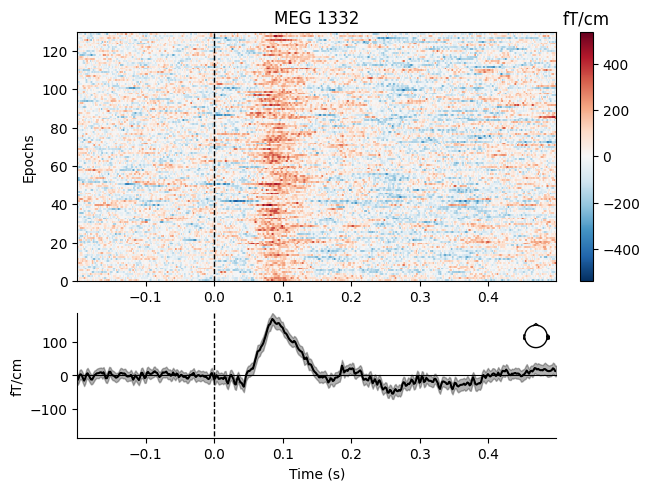

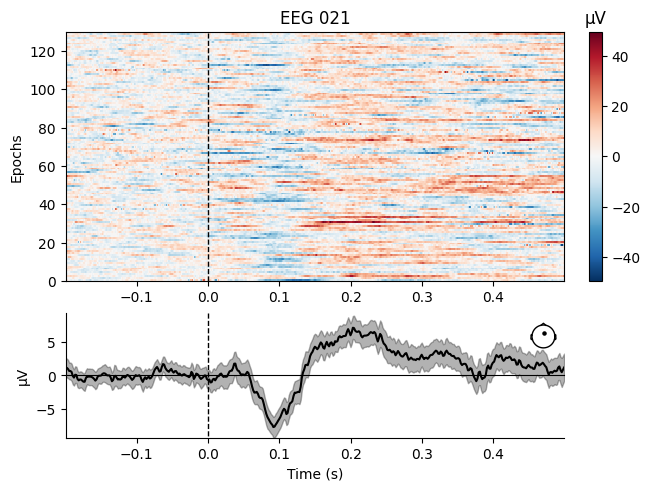

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [15]:
aud_epochs.plot_image(picks = ['MEG 1332', 'EEG 021'])

> Both [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) and [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) objects have [**`get_data`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.get_data) methods that return the underlying data as a [**`NumPy array`**](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray). Both methods have a `picks` parameter for subselecting which channel(s) to return; `raw.get_data()` has additional parameters for restricting the time domain. The resulting matrices have dimension `(n_channels, n_times)` for [**`Raw`**](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) and `(n_epochs, n_channels, n_times)` for [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs).

## Time Frequency Analysis

The [**`mne.time_frequency`**](https://mne.tools/stable/api/time_frequency.html#module-mne.time_frequency) submodule provides implementations of several algorithms to compute time-frequency representations, power spectral density, and cross-spectral density. Here, for example, we’ll compute for the auditory epochs the induced power at different frequencies and times, using Morlet wavelets. On this dataset the result is not especially informative (it just shows the evoked “auditory N100” response); see [here](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#inter-trial-coherence) for a more extended example on a dataset with richer frequency content.


No baseline correction applied


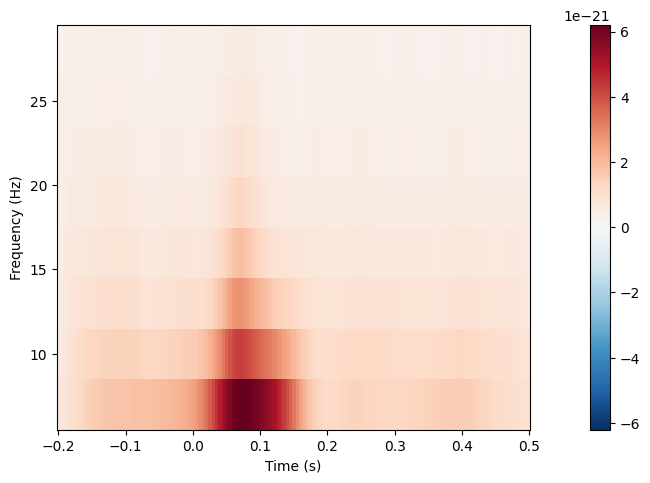

[<Figure size 640x480 with 2 Axes>]

In [16]:
frequencies = np.arange(7,30,3)
power = aud_epochs.compute_tfr(
    'morlet',
    n_cycles = 2,
    return_itc = False,
    freqs = frequencies,
    decim = 3,
    average = True
)
power.plot(['MEG 1332'])

## Estimating Evoked Responses

Now that we have our conditions in `aud_epochs` and `vis_epochs`, we can get an estimate of evoked responses to auditory versus visual stimuli by averaging together the epochs in each condition. This is as simple as calling the [**`average`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.average) method on the [**`Epochs`**](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) object, and then using a function from the [**`mne.viz`**](https://mne.tools/stable/api/visualization.html#module-mne.viz) module to compare the global field power for each sensor type of the two [**`Evoked`**](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked) objects.

Multiple channel types selected, returning one figure per type.
combining channels using RMS (grad channels)
combining channels using RMS (grad channels)


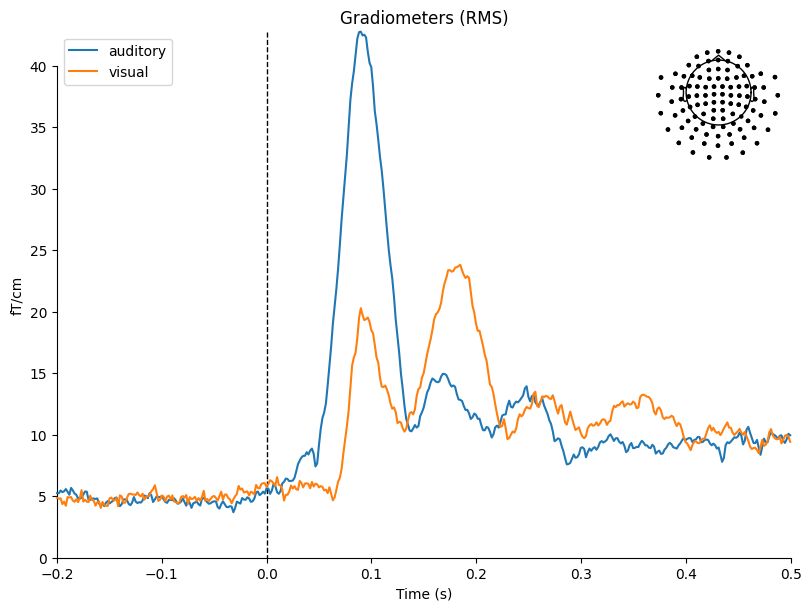

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


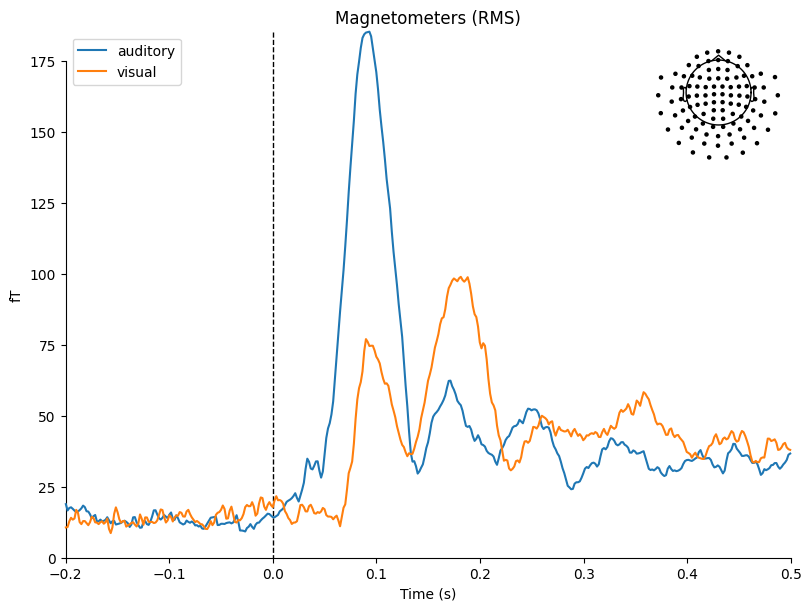

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


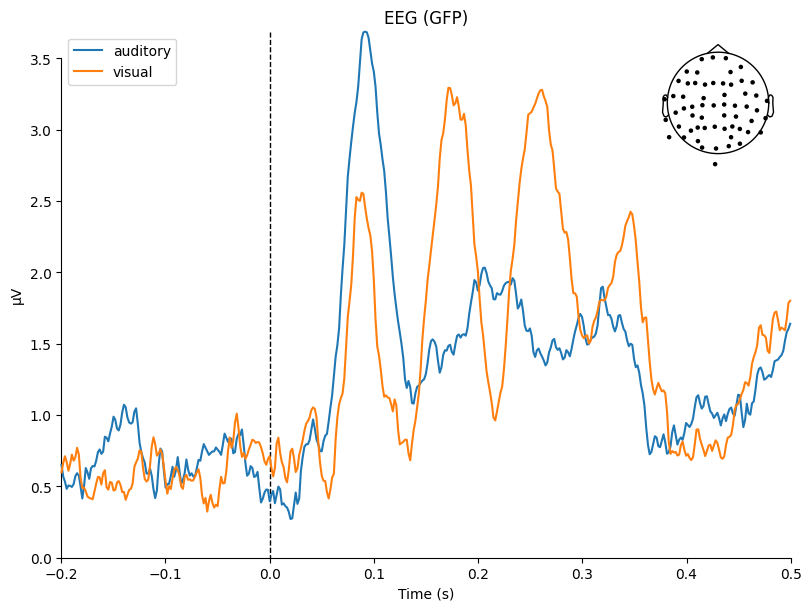

[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]

In [17]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(
    dict(auditory=aud_evoked, visual=vis_evoked),
    legend = 'upper left',
    show_sensors = 'upper right'
)

We can also get a more detailed view of each [**`Evoked`**](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked) object using other plotting methods such as [**`plot_joint`**](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_joint) or [**`plot_topomap`**](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap). Here we’ll examine just the EEG channels, and see the classic auditory evoked N100-P200 pattern over dorso-frontal electrodes, then plot scalp topographies at some additional arbitrary times.

Projections have already been applied. Setting proj attribute to True.


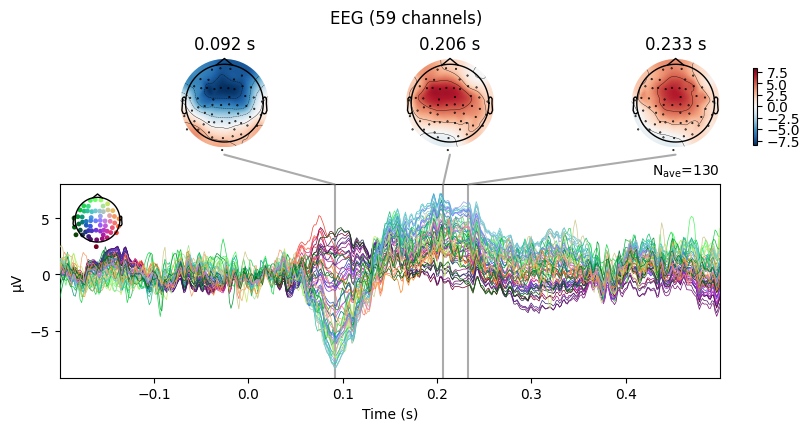

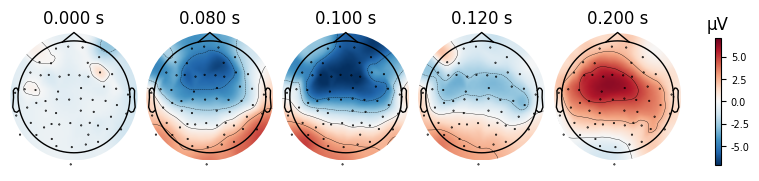

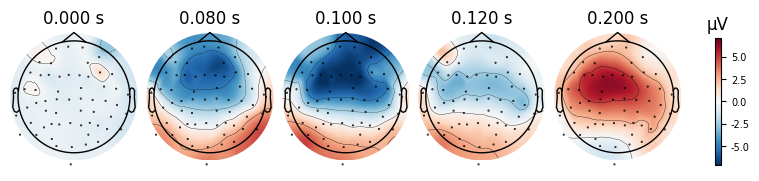

In [18]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times = [0.0, 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Projections have already been applied. Setting proj attribute to True.


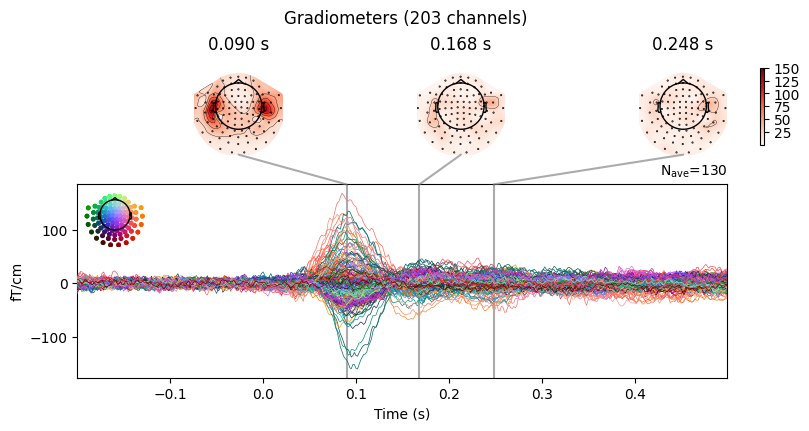

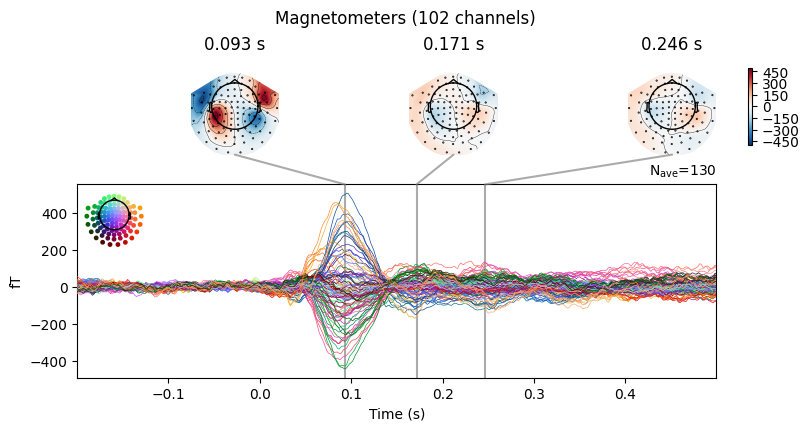

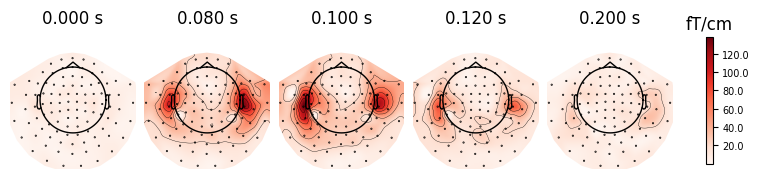

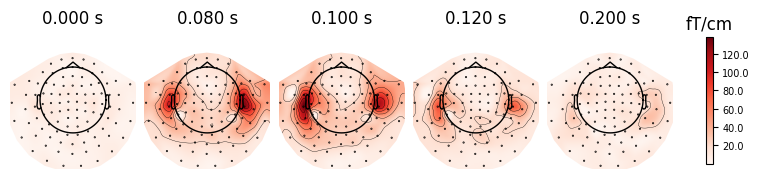

In [19]:
aud_evoked.plot_joint(picks='meg')
aud_evoked.plot_topomap(times = [0.0, 0.08, 0.1, 0.12, 0.2], ch_type='grad')

Evoked objects can also be combined to show contrasts between conditions, using the [**`mne.combine_evoked`**](https://mne.tools/stable/generated/mne.combine_evoked.html#mne.combine_evoked) function. A simple difference can be generated by passing `weights=[1, -1]`. We’ll then plot the difference wave at each sensor using **[plot_topo](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topo).**

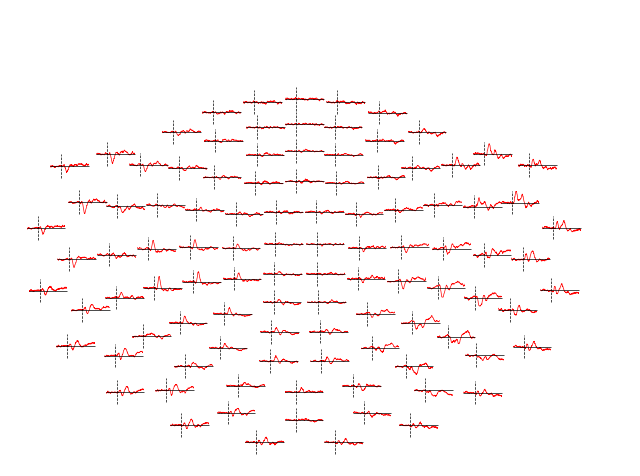

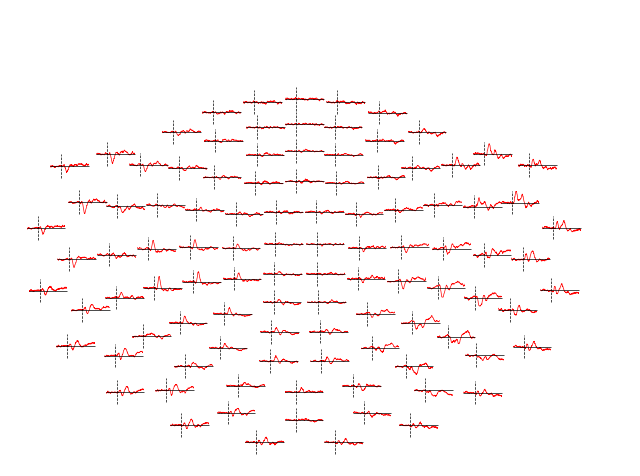

In [20]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1,-1])
evoked_diff.pick(picks='mag').plot_topo(color='r', legend=False)

## Inverse Modeling

Finally, we can estimate the origins of the evoked activity by projecting the sensor data into this subject’s [source space](https://mne.tools/stable/documentation/glossary.html#term-source-space) (a set of points either on the cortical surface or within the cortical volume of that subject, as estimated by structural MRI scans). MNE-Python supports lots of ways of doing this (dynamic statistical parametric mapping, dipole fitting, beamformers, etc.); here we’ll use minimum-norm estimation (MNE) to generate a continuous map of activation constrained to the cortical surface. MNE uses a linear [inverse operator](https://mne.tools/stable/documentation/glossary.html#term-inverse-operator) to project EEG+MEG sensor measurements into the source space. The inverse operator is computed from the [forward solution](https://mne.tools/stable/documentation/glossary.html#term-forward-solution) for this subject and an estimate of [the covariance of sensor measurements](https://mne.tools/stable/auto_tutorials/forward/90_compute_covariance.html#tut-compute-covariance). For this tutorial we’ll skip those computational steps and load a pre-computed inverse operator from disk (it’s included with the [sample data](https://mne.tools/stable/documentation/datasets.html#sample-dataset)). Because this “inverse problem” is underdetermined (there is no unique solution), here we further constrain the solution by providing a regularization parameter specifying the relative smoothness of the current estimates in terms of a signal-to-noise ratio (where “noise” here is akin to baseline activity level across all of cortex).

In [21]:
# load the inverse operator
inverse_operator_file = (
    sample_data_folder / 'MEG' / 'sample' / 'sample_audvis-meg-oct-6-meg-inv.fif'
)
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)

# Set signal-to-noise ratio (SNR) to compute regularization parameter (λ²)
snr = 3.0
lambda2 = 1.0/snr**2

# Generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(
    vis_evoked, inv_operator, lambda2 = lambda2, method='MNE'
)   # dSPM, sLORETA, eLORETA

Reading inverse operator decomposition from /Users/qbit-glitch/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Comput

Finally, in order to plot the source estimate on the subject's cortical surface we'll also need the path to the sample subject's structural MRI files (the `subjects_dir`)

In [ ]:
import mne
mne.viz.set_3d_backend('pyvistaqt')
# mne.viz.set_3d_backend('notebook')   # or let MNE auto-detect
# # ensure widgets are enabled in JupyterLab: jupyter labextension install @jupyter-widgets/jupyterlab-manager
# # (or use classic Jupyter Notebook)

# path to subject's MRI files
subjects_dir = sample_data_folder / 'subjects'

# Plot the STC (source time course)
stc.plot(initial_time=0.1,
         hemi = 'split',
         views = ['lat', 'med'],
         subjects_dir = subjects_dir,
         time_viewer = False)


Using pyvistaqt 3d backend.
Using control points [1.06131028e-10 1.26612309e-10 4.71416342e-10]


: 